### Understanding the Dataset
***

In [1]:
# reading the data in and exploring it
import pandas as pd
df_data = pd.read_csv("Data.csv")
df_data.head()

,Participant,HR,respr,Time(sec),Label
0,2,118.00,12.127693,1644227583,0
1,2,113.50,12.127693,1644227584,0
2,2,93.00,12.127693,1644227585,0
3,2,93.25,12.127693,1644227586,0
4,2,86.40,12.127693,1644227587,0


The independent variables in this dataset are:
1. Participant: A specific participant whose heart rate and respiratory rate we took for a given second
2. HR: The heartrate of the participant for a given second
3. respr: The respiratory rate of the participant for a given second
4. Time(sec): This is the total seconds from the unix epoch. The first row starts at Monday, 7th of February, 2022, 09:53:03

In the dataset we have the dependent variable Label
* Label is either 0 for not stressed, or 1 for stressed

We want to be able to predict whether the participant of the study is stressed (label=1) or not (label=0) by using their readings.

This problem can be solved by using a classification model. Classification is a supervised method where the model tries to predict the correct class/label, in our case we have two classes, stressed and not stressed. We are given labeled data and have plenty of information to create a classification model with good performance. 

### Data Exploration
***

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

My first goal was to check that there is an even amount of data per participant split between the test and training data. It would not be very balanced if we got more than 3000 seconds of participant 2 and then we got less than 200 seconds of participant 5 in either set. 

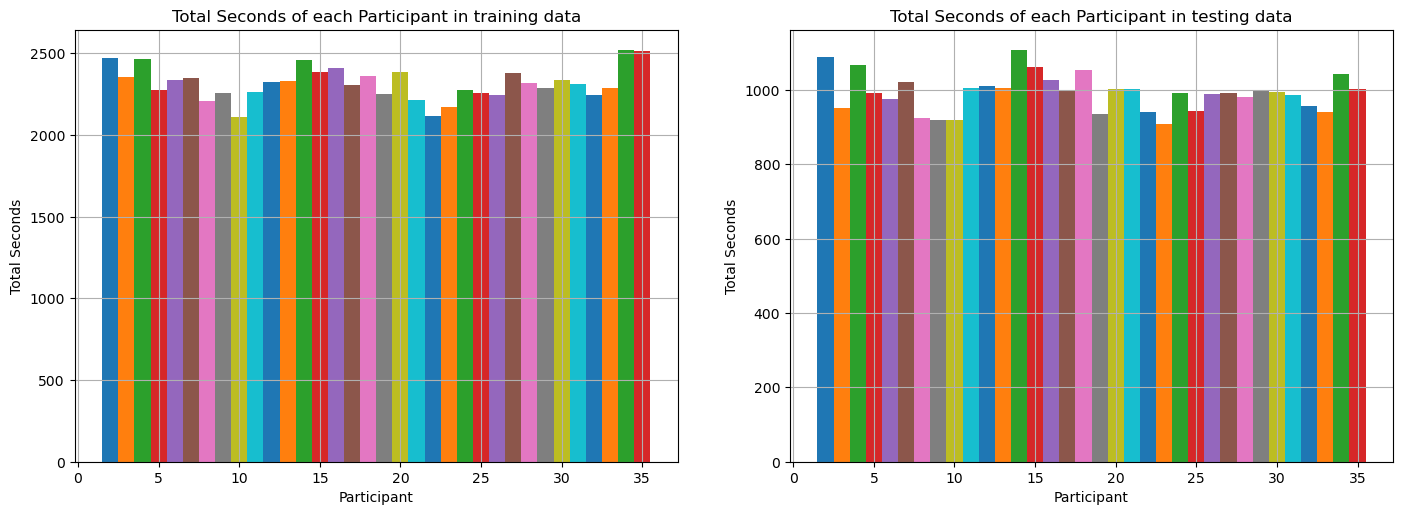

In [3]:
# Showcasing Participant frequency for both test and training set

fig,(ax0,ax1) = plt.subplots(nrows=1,ncols=2, figsize=(15,6))
fig.tight_layout(pad=5.0)

df_train.groupby('Participant')['Participant'].hist(ax = ax0 ,bins = 1);
ax0.set_xlabel('Participant')
ax0.set_ylabel('Total Seconds')
ax0.set_title('Total Seconds of each Participant in training data');

df_test.groupby('Participant')['Participant'].hist(ax = ax1 ,bins = 1);
ax1.set_xlabel('Participant')
ax1.set_ylabel('Total Seconds')
ax1.set_title('Total Seconds of each Participant in testing data');

My first plot checks for the frequency (which can be the same as saying total seconds, as each row of data for each participant is one second) shows us that each set mostly has an average amount of each participant present. This is very good because we are trying to identify whether a participant of the study is stressed or not stressed, and having a balanced frequency in both sets gives us confidence in both sets to continue furtur analysis.

I think it is important to note that I am using the test.csv and train.csv that was provided with the assignment. It is possible to use a built in function to split Data.csv into training and testing set. These built in functions use a random seed to split the data, which can sometimes end up with an imbalanced split.

Nontheless, a balanced split is important for good performance.

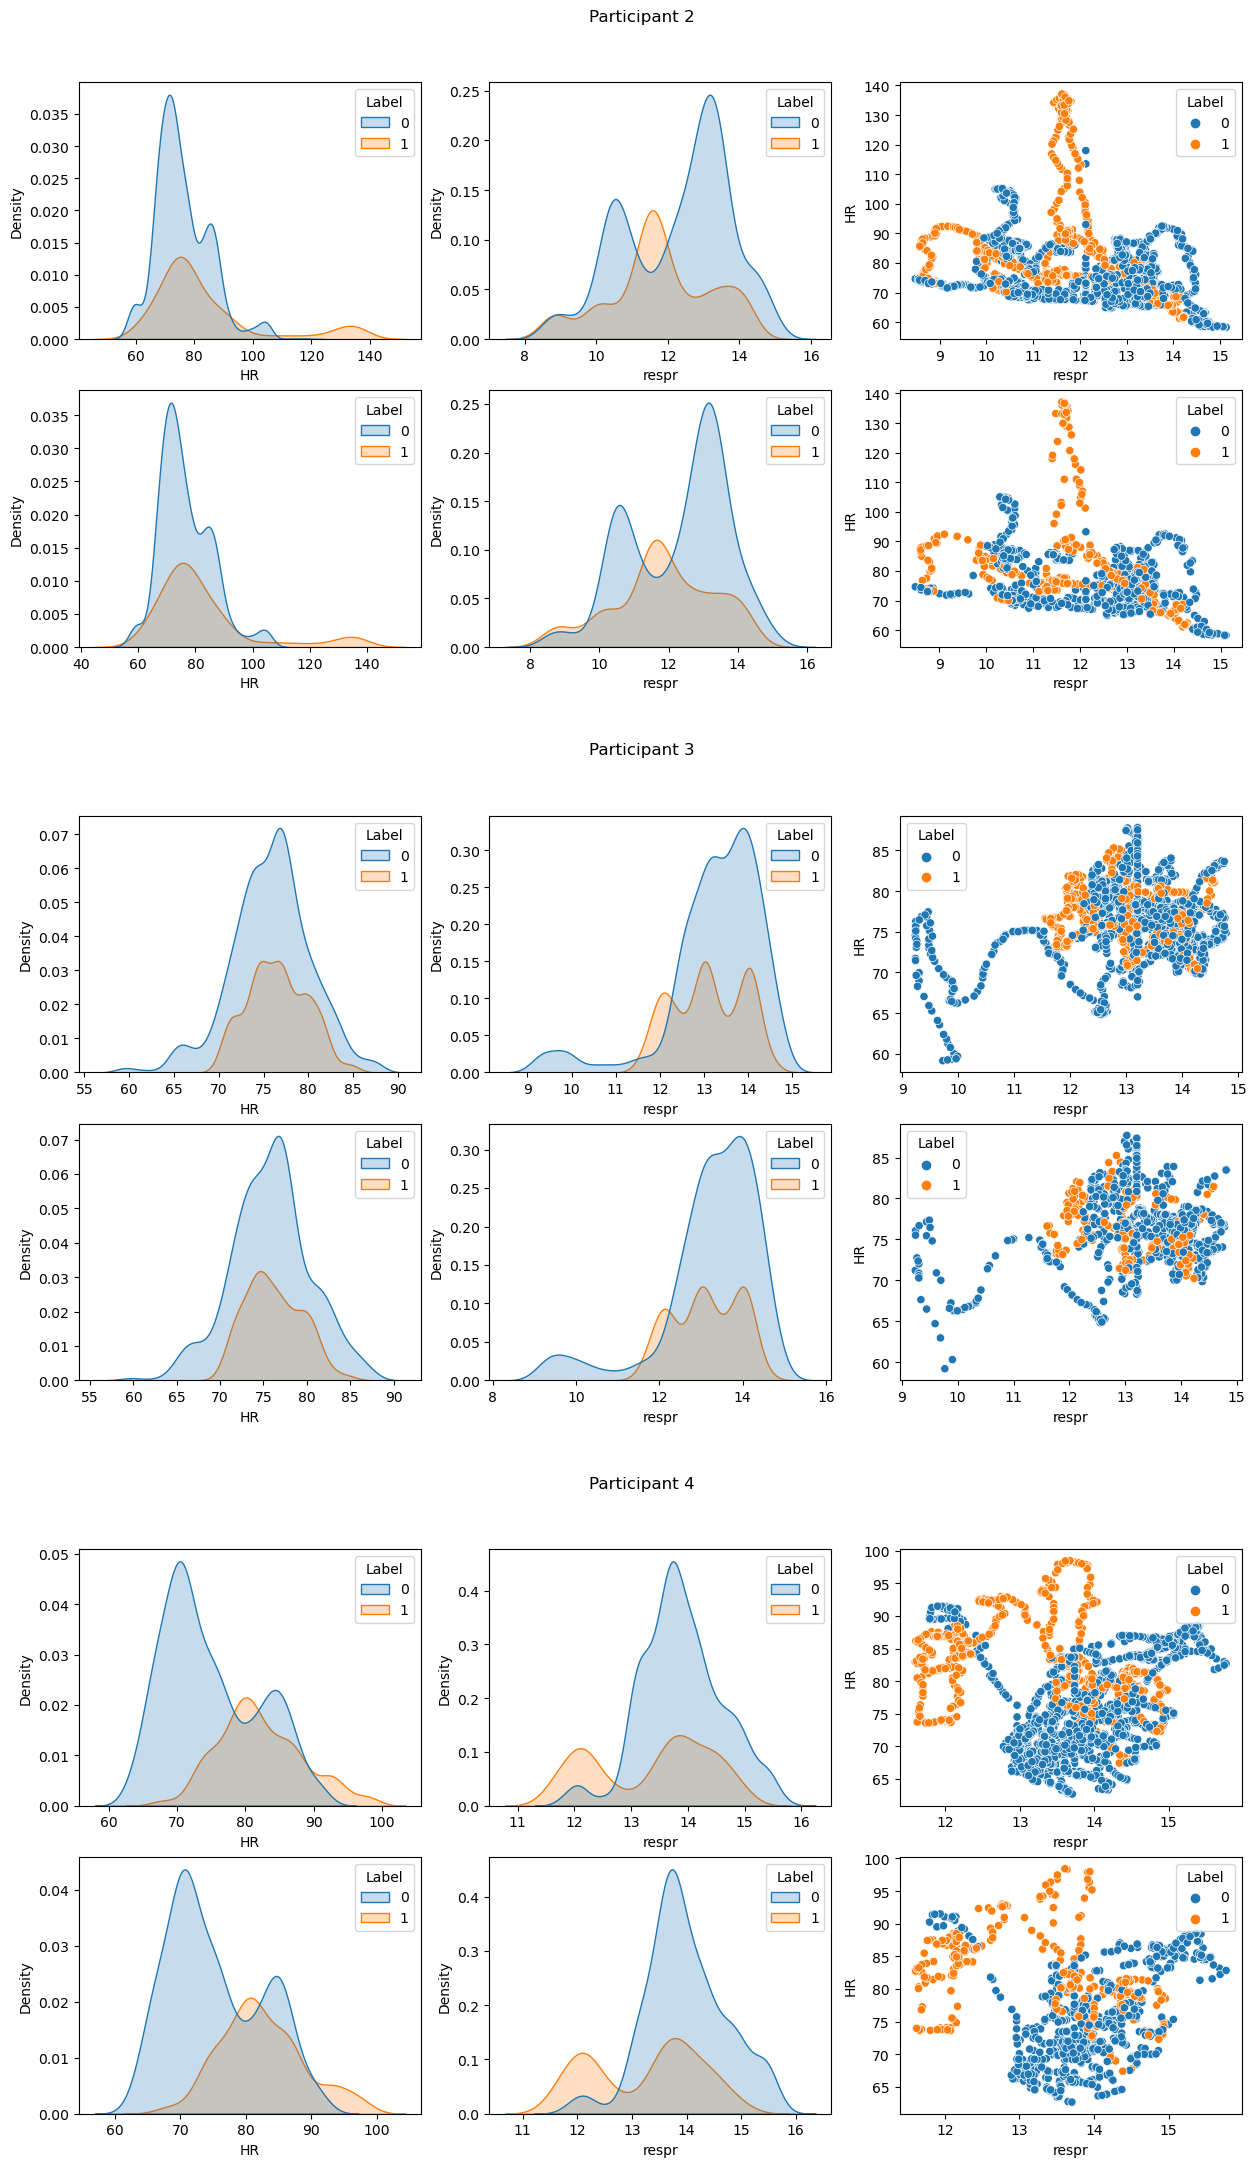

In [4]:
# Taking the first three participants from both the training and testing set then plotting their HR density, respr density and scatter plot of HR + respr
fig = plt.figure(figsize=(15,22))

subfigs = fig.subfigures(nrows = 3, ncols = 1)
for i, subfig in enumerate(subfigs):
    subfig.suptitle(f"Participant {i + 2}")
    
    axs = subfig.subplots(nrows = 2, ncols = 3)
    # plotting the training data
    sns.kdeplot(data=df_train[df_train.Participant == (i + 2)], x = 'HR', hue='Label', fill=True, ax = axs[0][0]);
    sns.kdeplot(data=df_train[df_train.Participant == (i + 2)], x = 'respr', hue='Label', fill=True, ax = axs[0][1]);
    sns.scatterplot(data=df_train[df_train.Participant == (i + 2)], x = 'respr', y = 'HR',hue='Label', ax = axs[0][2]);
    
    # plotting the test data below the training data to easilly compare between the two
    sns.kdeplot(data=df_test[df_test.Participant == (i + 2)], x = 'HR', hue='Label', fill=True, ax = axs[1][0]);
    sns.kdeplot(data=df_test[df_test.Participant == (i + 2)], x = 'respr', hue='Label', fill=True, ax = axs[1][1]);
    sns.scatterplot(data=df_test[df_test.Participant == (i + 2)], x = 'respr', y = 'HR',hue='Label', ax = axs[1][2]);

Here I am taking the same three participants and checking the density of their HR, respr and the scatter plot of both HR and respr. I am then checking that there is a balanced distribution of labeled data between both datasets per participant. This is to confirm that neither dataset received an overwheleming amount of a single label in the dataset for a participant. If the training data had a majority of label 0's and no label 1's, then the dataset would be imbalanced and would struggle to classify the correct label when testing.

As we can see here, the distribution is very balanced between participants in both datasets. There seems to be a fair split between the Labels meaning we would be getting good performance when we train and test our model.

Here I have only chosen three participants, but I have plotted all the participants and checked. I didn't show this because there would be too many graphs and it would take a long time to run the code.

My verdict is that this is a very balanced split between the training and test dataset. There is an even balance of frequency per participant in both datasets as well as an even balance of labels per participant in both datasets. 

### Choosing an ML Package
***

1. TensorFlow: Tensorflow is an open-source library for fast numerical computing and machine learning. It was developed by Google. We can use Tensorflow with python by installing the package and importing it. Tensorflow uses C++ under the hood for better performance. Tensorflow uses Tensors, which is like a matrix for storing, representing and changing data. It is also possible to make use of your systems GPU when doing these calculations, making it complete faster.

2. PyTorch: PyTorch is an open-sorce library for machine learning. It was developed by Meta. It can be used to create deep neural networks. We can use it with python and it is easy to install and import into our project. PyTorch also makes use of tensors as its main data structure.

3. Weka: Weka is an open source collection of machine learning algorithms for data mining tasks. Weka has many tools for data pre-processing, machine learning algorithms, and visualisation which we can use in our Java code. It has a very friendly GUI which makes it easier to use.

4. Scikit-learn: Scikit-learn is a free and popular machine learning library for Python. It has a large collection of supervised and unsupervised tools for machine learning and statistical models. Scitkit learn is a very popular open source library because it is easy to use and install. There are many exacmples of the algorithms and documentation on their official website. It has great support with popular Python libraries such as Pandas, Numpy, SciPy and Matplotlib making it easier to get into.

I've chosen to go with Scikit-learn. It's the library I have the most experience with and feel as though there are many great features that make it perfect for this assignment. I can easilly import and use many of their classification models to fit my training data and then test it. I have a lot of control and ease when it comes to reading my data in, plotting it, then fitting it and testing it out. These are my reasons for choosing Scikit-learn

### Data Pre-processing 
***

I'm going to use the the provided train.csv and test.csv. I could use Scikit-learns built in function train_test_split to split the Data.csv into two separate training and testing sets. Because I have done analysis previously on the train.csv and test.csv, I have confidence that they are balanced. Using the built in function would mean that the data would be split using a random seed, which would require me to analysis it to make sure that it is balanced.

In [5]:
# Reading in both datasets into separate dataframes
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

# Checking and getting rid of missing data
df_test = df_test.dropna()
df_train = df_train.dropna()

# Making Training sets
X_train = df_train.drop(['Label'], axis=1)
y_train = df_train['Label']

# Making Testing sets
X_test = df_test.drop(['Label'], axis=1)
y_test = df_test['Label']

# Checking the size of all the datafraSmes
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((78729, 4), (78729,), (33743, 4), (33743,))

I have now made my training and testing sets that are good to fit into a scikit-learn classification model. First I dropped all missing data, there were only a handful of rows that had HR missing so I went and got rid of them. I then split the training set into two dataframes, X_train contains all the independent variables and y_train contains the dependent variable Label. I did the same for the testing set, X_test contains all independent variables and y_test contains the dependent variable Label.

### Algorithm Selection and Application
***

#### Decision Tree Classifier from scikit-learn
I will be using the Decision Tree Classifier because we learned about decision trees in the supervised learning lectures and I want to see how it will perform with this dataset. Decision trees are a fundemental structure used in information-based machine learning. The main idea behind Decision trees is using them as a predictive model, to decide what label/class an item belongs to. They are called as such because of their tree-like structure. We start with a node, which is a decision point and partitions the data. Observation about an item, the values of the feature, are represented using branches. Using these branches we go from node to node depending on the items value. Terminal nodes are called leafs and these will specify the target label/class for the item.

Decision Trees use information gain to find features with the highest discriminatory power. First we calculate the Entropy of the features, then we use their Entropy inside our information gain formula and get a value out of it. The higher the value, the more discriminatory power it has and in general the higher it will be in the decision tree. It first gets the root node, the feature which had the highest information gain. Then to calculate the node after this, we get all the data that branches off from the root node and use that as our "entire" data set for the information gain formula. This means at each branching path, we need to recalculate information gain for each feature that is left until we reach the leaf node.

Decision trees are popular because they are relatively easy to use, fast and have a comprehensive output which is important for decision making. They are practical and can deal with discreet and numeric values. Although, there are some issues with Decision trees. The hypothesis found is sensitive to the training set used, replacing one row can sometimes lead to a completely new tree structure. This is a concequence of greedy search. There are some techniques to overcome this, this is called pruning. We can pre-prune and post-prune the decision tree. Pre-pruning is done before the tree is built, a few ways we can do this is by setting a max depth of the tree structure, only using the feature if it has a high enough information gain and using features that are above a certain amount of examples. Post pruning is done after the tree structure, and some say there is more merit to doing this as we let the Decision tree grow naturally.

There are alternative methods to select the best attribute for a node. These include GainRatio and GiniGain. There are many related algorithms such as 1R and Decision Stamp which are very simple variants that are used in ensemble methods. Decision Trees are very comprehensive, fast and have a lot of support around them. For these reasons I want to use scikit-learn's version of a Decision Tree for classification called Decision Tree Classifier on the given dataset and see how it will perform. Source of information from lecturers and personal notes

#### k-Nearest Neighbors Classifier from scikit-learn

The next algorithm I will use is k-Nearest Neighbors Classifer. We also learned about this in the Similarity-based learning lectures and was curious on how it would perform with this dataset. The Nearest Neighbours algorithm is a simple similiarity based method. There is no real training phase, we are just storing the training cases. This is because when we are going to be predicting a new case, it will use the existing training cases and will calculate their distances from the new case. In a simple Nearest Neighbours algorithm classifier, it will find the closest training case and give the new case the same label/class as the closest training case. There are then two considerations.

To be able to find the distance we need to first use a metric. There are a few formulas we can use for calculating the distance between two points. The first and most known distance metric would be Euclidean distance. Another metric we can use is the manhattan distance metric or also known as "taxicab distance", named for how taxis drive around city blocks. These two distance metrics can all be generalised using the Minkowski distance metric. This formula can represent the manhattan distance, euclidean distance and an infinite different distance metrics by changing the value of p in it's formula. The manhattan distance is cheaper to compute than euclidean distance, so in a case where there is a large dataset and limited computer power, it would be worthwhile to use manhattan distance. In any case, using either of these metrics would help us determine the distance between two points.

Then is the case of noise. In a simple Nearest Neighbours algorithm, it will match a new case with the closest training case. This means it is quite susceptible to noise. A solution to this is using the k-nearest Neighbours algorithm. Where k is a value we chose, usually between the range of 3-21. This means when we want to predict a new case, it will now get the k nearest cases, and choose a label/class that the majority of the k chosen training cases have. This fixes our problem where it is susceptible to noise. When selecting a k for our dataset, we need to experiement and see which one gives the best result. But we need to be mindful, as too low of a k tends to overfit if the data is noisy, whereas if k is too high it tends to underfit. A good solution to underfitting when k is high, is giving each neighbour a distance weight. This means that although it will still pick the k nearest neighbours, it will now take into consideration it's distance, meaning further neighbours are worth less than neighbours that are nearby our new case. 

A big reason for me wanting to use k-Nearest Neighbours was because of scikit-learns cheat sheet on choosing an approriate algorithm : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html 

k-Nearest Neighbours are very comprehensive, fast and have a lot of support around them. For these reasons I want to use scikit-learn's version of a k-Nearest Neighbour for classification called KneighboursClassifer on the given dataset and see how it will perform. Source of information from lecturers and personal notes.

### Model Evaluation
***

#### Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier

# Decision tree with default arguments
dtc = DecisionTreeClassifier()
# Model is now fitted with the training data
dtc.fit(X_train, y_train); 
# Scoring it on the testing data
dtc.score(X_test, y_test)

0.984470853214

I am getting a 0.98 Coefficient of determination for R^2. This means the decision tree algorithm is very accurate when it is scored on the testing data.

I wonder how the effect of the max_depth has on R^2 in this Decision Tree

In [7]:
print(f"The Max depth of the above fitted tree is {dtc.tree_.max_depth}")

The Max depth of the above fitted tree is 33


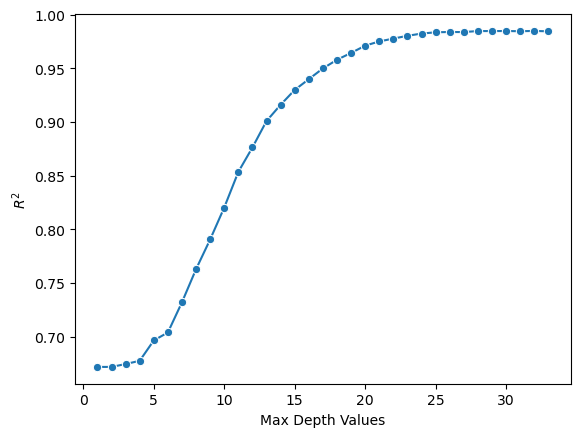

In [8]:
# Setting Max Depth from 1 to 33 and plotting R^2 score
max_depth_values = [i for i in range (1, 34)]
coef_scores = []

for i in max_depth_values:
    dtc = DecisionTreeClassifier(max_depth = i)
    dtc.fit(X_train, y_train)
    score = dtc.score(X_test, y_test)
    coef_scores.append(score)

# Plotting
plt.xlabel("Max Depth Values")
plt.ylabel(r'$R^2$')
sns.lineplot(x = max_depth_values, y = coef_scores, marker='o');

We this information, it is possible to set the max_depth of the decision tree to about 23, with it still maintaing the same high R^2 score and being computationally less intensive

#### k Nearest Neighbour Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# First we need to scale the data for the K Neighbors Classifier
scaler = StandardScaler().set_output(transform="pandas")
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
# Model is now fitted with the training data
knn.fit(scaled_X_train, y_train); 
# Scoring it on the testing data
knn.score(scaled_X_test, y_test)

0.9194203242153928

I am getting a 0.91 Coefficient of determination for R^2. This means the k nearest neighbour is very accurate when it is scored on the testing data.

I wonder how the effect of k will affect R^2

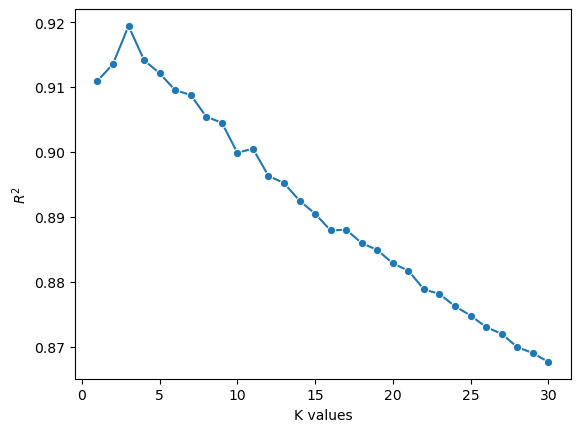

In [33]:
# Setting k from 1 to 30 and plotting R^2 score
k_values = [i for i in range (1, 31)]
coef_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(scaled_X_train, y_train)
    score = knn.score(scaled_X_test, y_test)
    coef_scores.append(score)

# Plotting
plt.xlabel("K values")
plt.ylabel(r'$R^2$')
sns.lineplot(x = k_values, y = coef_scores, marker='o');

Here we can see that we get the highest R^2 when k = 3 and that the accuracy gets worse as we increase k.

Now I will plot the decision boundary of this k nearest neighbours algorithm

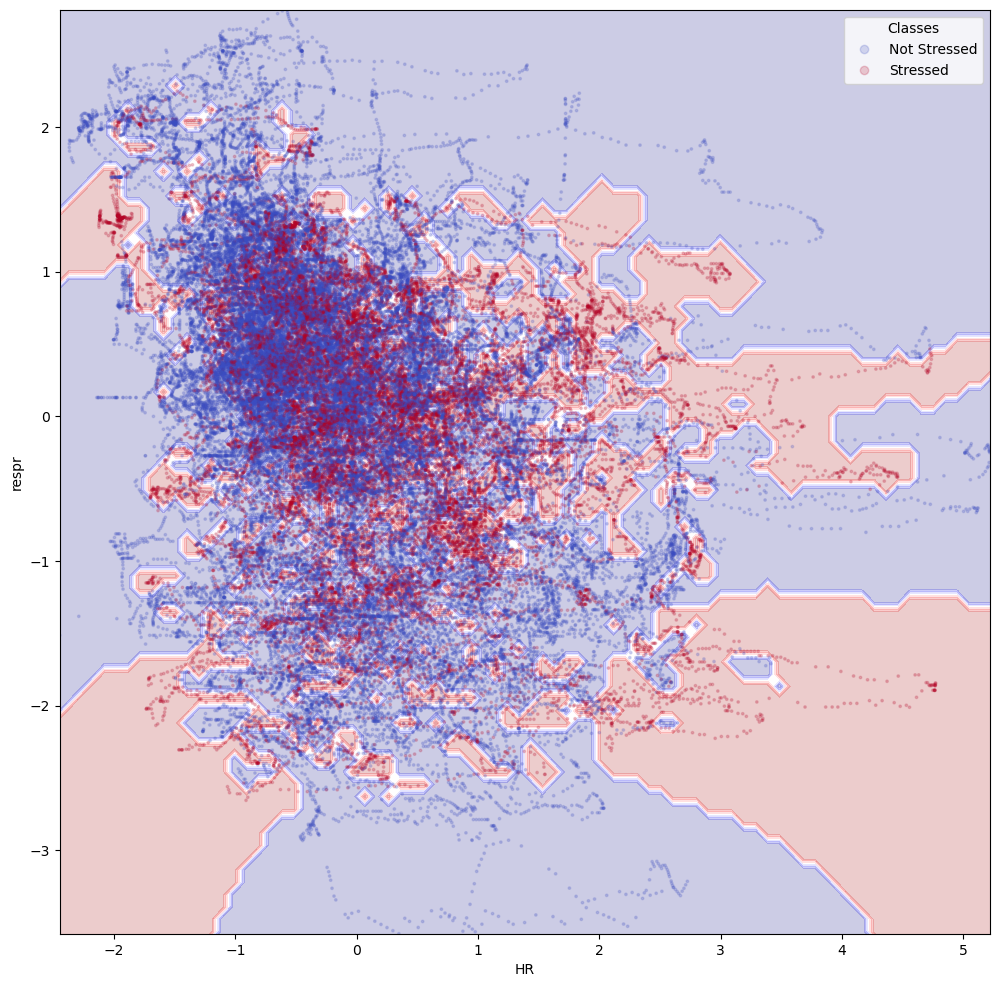

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay

X = scaled_X_train[['HR', 'respr']]
knn.fit(X, y_train)

fig, ax1 = plt.subplots(1, 1, figsize=(12, 12))

disp = DecisionBoundaryDisplay.from_estimator(knn, X, cmap='seismic', response_method="predict", alpha=0.2, ax=ax1)

scatter = disp.ax_.scatter(X["HR"], X["respr"], c=y, s=3, cmap='coolwarm', alpha=0.2)
disp.ax_.set_xlim((X["HR"].min(), X["HR"].max()))
disp.ax_.set_ylim((X["respr"].min(), X["respr"].max()))
disp.ax_.legend(scatter.legend_elements()[0],["Not Stressed", "Stressed"],title="Classes");

### Comparative Analysis
***
The two models provide very good performance. With both models achieving over 0.9 R^2. 

For the Decision Tree, I believe that there was enough data in the training set to fit a very comprehensive tree. When scored with the test data, it performed the best out of the two algorithms. There was also no need to scale the data. The Decision tree was able to make rules from the feature values and constructured a very good generalised model that was able to get a 0.98 R^2 score on the testing data

For the k nearest neighbor algorithm, it was also very good at scoring against the test data when fitted with the training data. It scored a bit worse on the testing data because it is an instance based model. The k nearest neighbor algorithm isn't trying to construct a general internal model so when it encounters the test data it fails to correctly fit a small amount of test cases. 

Overall, these algorithms performed very well with this dataset and provided very good insights on how the algorithms work.